# Circular Motion

The purpose of this juptyer notebook is to take a csv or Excel file of accelerometer readings from a turntable and return the raduis of this turntable as well as the angular velocity. This notebook is taylored to work with the ouput from the Phyphox app for the iPhone, specifically the "Acceleration (without g)" raw sensor, (also available for android), but we have tried to make it easily modified for other apps. To generate the necessary data we began the recording and then put the phone on the turntable with enough time for at least six or seven rotations. Using the acceration data we created a plot and used a Fourier transformation to find the frequency of motion.

### The Input File Specification

What follows assumes that the input.csv file resembles:
```
Time (s), Linear Acceleration x (m/s^2), Linear Acceleration y (m/s^2), Linear Acceleration z (m/s^2), Absolute acceleration (m/s^2)

0.000000,	-0.081457,	-0.065700,	-0.114250,	0.154935,
0.009988,	-0.081636,	-0.057592,	-0.085180,	0.131289,
0.019976,	-0.151881,	-0.028972,	-0.128110,	0.200797,
0.029963,	-0.145120,	-0.014326,	-0.186789,	0.236971,
0.039951,	-0.052697,	-0.040153,	-0.211472,	0.221607

```
The ```Time (s)``` column has a time stamp for each data point given in seconds by time elapsed since the recording started.

The accelerometer calculates acceleration in the $x$, $y$, and $z$ directions. The ```Linear Acceleration x (m/s^2), Linear Acceleration y (m/s^2)``` and ```Linear Acceleration z (m/s^2)``` columns represent these directional accelerations respectively. For the iPhone and this particular app, the $x$-axis is parrallel to the width of the phone, the $y$-axis is parallel to the height of the phone, and the $z$-axis is perpendicular to the face of the phone, where a vector coming out of the face of the phone points in the positive direction. Your axes may be oreinted differently. You may also need to edit the headers depending on the format of your data file.

The ```Absolute acceleration (m/s^2)``` column values is the magnitude of the vector ```<Linear Acceleration x (m/s^2), Linear Acceleration y (m/s^2), Linear Acceleration z (m/s^2)>```. It is always positive and not relevant for our experiment. We will be interested in the $x$ and $y$ acceleration.

In [1]:
# These are the necessary libraries to plot, deal with arrays, and convert time from day to seconds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft

### Data Collection
The acceleration readings in this experiment are from the PhyPhox app, but other accelerometer or G-force app sensors would also work with som modification. An iPhone 8 was placed on the end of a turntable. Then the turntable was started at a constant speed after the recording began. After 30 seconds or so the recording and turntable were stopped. If a turntable is not accessible there are other options such as using a desk chair or salad spinner; however, these result in more difficulty maintaining uniform circular motion which is necessary for this experiment.

We'd recomend performing this experiment three times and averaging the data values. This provides students with more accurate results and teaches the importance of multiple trials in the scientific method. 

In [2]:
# Looking at the first few data points on the file
raw = pd.read_excel("TurntableGforce.xls")
raw.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000000,-0.290136,0.569650,-1.237718,1.393063
1,0.009989,-0.245318,0.710297,-1.140861,1.366113
2,0.019978,-0.330835,0.760613,-1.028888,1.321587
3,0.029968,-0.343731,0.728265,-0.757940,1.105891
4,0.039957,-0.242073,0.668524,-0.233431,0.748341


In [3]:
# Creating each of the necessary columns of data into array
t = np.array(raw['Time (s)'])
ax = np.array(raw['Linear Acceleration x (m/s^2)'])
ay = np.array(raw['Linear Acceleration y (m/s^2)'])

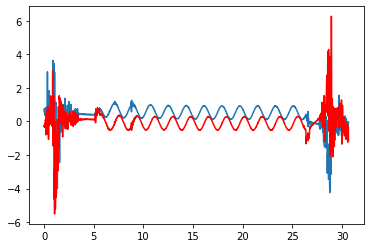

In [4]:
# A plot of 
plt.plot(t, ay)
plt.plot(t,ax,'red')

### Data Modification
Since it is tricky to have the recording begin once the turntable has already started spinning, there is data in the very beginning that is not representative of uniform circular motion. Similarly there is also data at the end of the recording which should not be included. In the following section, we remove data from the end and beginning by visual inspection of the plot above. The purpose is to only have the data that is representative of uniform circular motion which is where the acceleration plots look like $\sin$ or $\cos$ functions. In our case, this occus from approximately 5 seconds to 25 seconds. Given the average time between data points is 0.013 seconds, we can choose how to splice our time and acceleration arrays to obtain only the relevatn data.

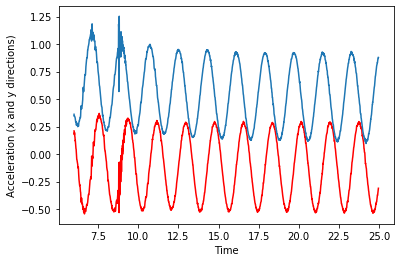

In [5]:
# These are conservative estimates of how to splice the arrays
t = t[600:2500]
ax = ax[600:2500]
ay = ay[600:2500]
plt.xlabel("Time")
plt.ylabel("Acceleration (x and y directions)")
plt.plot(t,ax, 'red')
plt.plot(t,ay)

In [17]:
# Here we find the average time between data points
total_time = t[-1] - t[0]
dt = total_time/len(t)
total_time
#dt

18.96952150017023

### Approximating the Period
Our next time in this notebook will be to use a Fourier transformation to find the period of motion. However, first we will look at how to estimate the period to check our own calculations for reasonability. Examining the plot of the modified data from above, we can look at both the $x$ and $y$ acceleration plots to find how many oscillations there are within this time period. By inspection, we see that there are approximately 10 oscillations. The period of motion can be given by the total time divided by our number of oscialltions. This is approximated below and it looks as if our period of motions in close to two and a half seconds.

In [18]:
total_time/10

1.896952150017023

### Fourier Transformations 
The fourier transformation is a complicated process. For our purposes, it suffices to note that the Fourier transformation essentially acts like a power series to describe the discrete data we collected. This process helps to approximate the number of osciallations in the motion and thus the frequency and period as well. The python function we use below, fft() outputs an array that is the same size as our acceleration array. Where the maximum of this array occurs is the number of oscillations that is the "best fit" for our data. We can perform this process on both the accerlation data in the $x-$ and $y-$ directions to compare since both should have the same number of oscillations.

In [19]:
fx = np.abs(fft(ax))
fy = np.abs(fft(ay))

<BarContainer object of 799 artists>

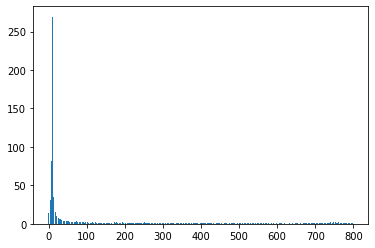

In [20]:
# We plot the first half of the fourier transform because the second half is a reflection
# This is to see approximately where our peak is
# The first graph represents x-acceleration and the second graph represents y-acceleration
plt.bar(range(len(fx[1:800])),fx[1:800])

<BarContainer object of 799 artists>

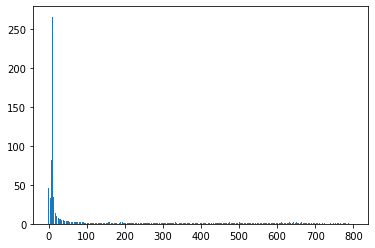

In [21]:
plt.bar(range(len(fy[1:800])),fy[1:800])

<BarContainer object of 25 artists>

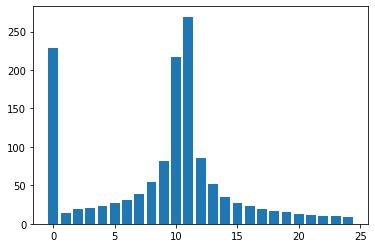

In [22]:
# Now we'll zoom in 
plt.bar(range(len(fx[0:25])),fx[0:25])

<BarContainer object of 25 artists>

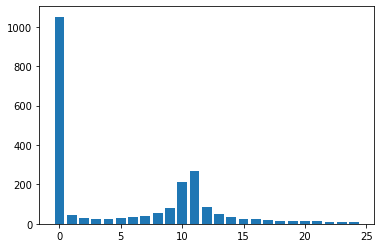

In [23]:
plt.bar(range(len(fy[0:25])),fy[0:25])

In [24]:
#plt.plot(range(len(fx[1:int((len(fx)/2))])),fx[1:int(len(fx)/2)])

### Interpreting the Fourier Transformation 
We use the above bargraphs to find the peek of the Fourier transformation, below we find it exactly by using the argmax() function in Python. Note the first bar is not relevant. However, sometimes there is more that one peek that stands out. For the example data the mode is at 11, however, for both graphs the bar at 10 is also quite tall relative to the other data. Given that the bar at 11 is approximately 80% as high as the bar at 11, we can approximate the number of oscillations by 10.6. For our purposes, this estimation will suffice. Given a total time of $18.97$ seconds, we can calculate a period of $T = \frac{18.97}{10.6} = 1.79$ seconds and a frequncey of $f = \frac{1}{T} = \frac{1}{1.79} = 0.59$.

In [25]:
N = len(t)
np.argmax(np.abs(fx[1:N//2])) +1
np.argmax(np.abs(fy[1:N//2])) +1

11

### Finding Angular Velocity
Angular velocity can be represented by $$\omega = \frac{d\theta}{dt}.$$ Now we have calculated the period $T$, and we know the change in the angle for each period is $2\pi$. Since we have uniform circular motion, we can calculate the constant angular velocity by $$\omega = \frac{d\theta}{dt} = \frac{2\pi}{T} = \frac{2\pi}{1.79 sec} = 3.51\frac{rad}{sec}.$$

### Finding Revolutions Per Minute 
To convert from period to revolutions per minute, we can perform the following dimmensional analysis, $$\frac{2\pi rad}{1.79 sec}\bigg(\frac{1 revo}{2\pi rad}\bigg)\bigg(\frac{60 sec}{1 min}\bigg) = 33.51\frac{revo}{min}.$$ This makes sense because we set the record player to 33 and a thrid.